In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
from Models.Charts import Charts

In [4]:
file = 'datos/avocado.csv'
chart = Charts(file)
#Hacemos una limpieza la columna Unnamed
chart.clearData('Unnamed: 0')
# Comprobamos si hay valores nulos
chart.isNull()
chart.showData()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


<Figure size 1000x500 with 0 Axes>

In [5]:
# 1.1 Descomposición de Series Temporales de Precios:
# Uso de Datos: Usa la columna AveragePrice y Date.
# Convierte Date a tipo datetime usando pd.to_datetime().
chart.formatDate('Date')

In [6]:
# Esperado: Utiliza la función seasonal_decompose de la librería statsmodels para descomponer 

# Agrupa los datos por Date y calcula el promedio de AveragePrice utilizando groupby() si es necesario.
promedio_por_fecha = chart.df.groupby('Date')['AveragePrice'].mean()
promedio_por_fecha
# la serie temporal de precios en componentes de tendencia, estacionalidad y ruido.
descomposicion = chart.seasonal_decompose(promedio_por_fecha, model='additive',period=54)

(array([16556., 16679., 16801., 16922., 17045., 17167., 17287., 17410.,
        17532.]),
 [Text(16556.0, 0, '2015-05'),
  Text(16679.0, 0, '2015-09'),
  Text(16801.0, 0, '2016-01'),
  Text(16922.0, 0, '2016-05'),
  Text(17045.0, 0, '2016-09'),
  Text(17167.0, 0, '2017-01'),
  Text(17287.0, 0, '2017-05'),
  Text(17410.0, 0, '2017-09'),
  Text(17532.0, 0, '2018-01')])

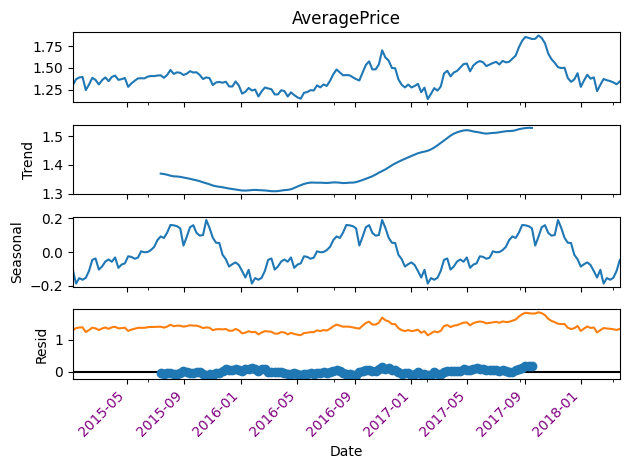

In [7]:
# Visualiza los componentes descompuestos usando matplotlib para cada uno de ellos.
descomposicion.plot()
promedio_por_fecha.plot()
plt.xticks(rotation=45,color="purple") 

In [8]:
# 1.3 Análisis de Estacionalidad por Región:
# Uso de Datos: Usa las columnas AveragePrice, Date y Total Volume.
# Esperado: Utiliza gráficos de líneas para visualizar cómo varían los precios de aguacates por región a lo largo de diferentes estaciones del año.
# Agrupa los datos por region y Date utilizando groupby().
# Calcula el promedio de AveragePrice para cada región.
# Representa gráficamente las tendencias utilizando plt.plot() de matplotlib.

cols = chart.df[['AveragePrice','Date','Total Volume']]
chart.formatDate('Date')
chart.df['year'] = chart.df['Date'].dt.year
promedio_anual = chart.df.groupby(['region', 'year'])['AveragePrice'].mean().reset_index()
promedio_anual.sample(frac=0.2).sort_values(by=['year', 'region'])

,region,year,AveragePrice
12,Boise,2015,1.373750
20,BuffaloRochester,2015,1.544615
56,GrandRapids,2015,1.416346
64,HarrisburgScranton,2015,1.471635
80,Jacksonville,2015,1.503077
88,LosAngeles,2015,1.152500
96,MiamiFtLauderdale,2015,1.383558
100,Midsouth,2015,1.351346
128,Philadelphia,2015,1.555192
136,Pittsburgh,2015,1.407212


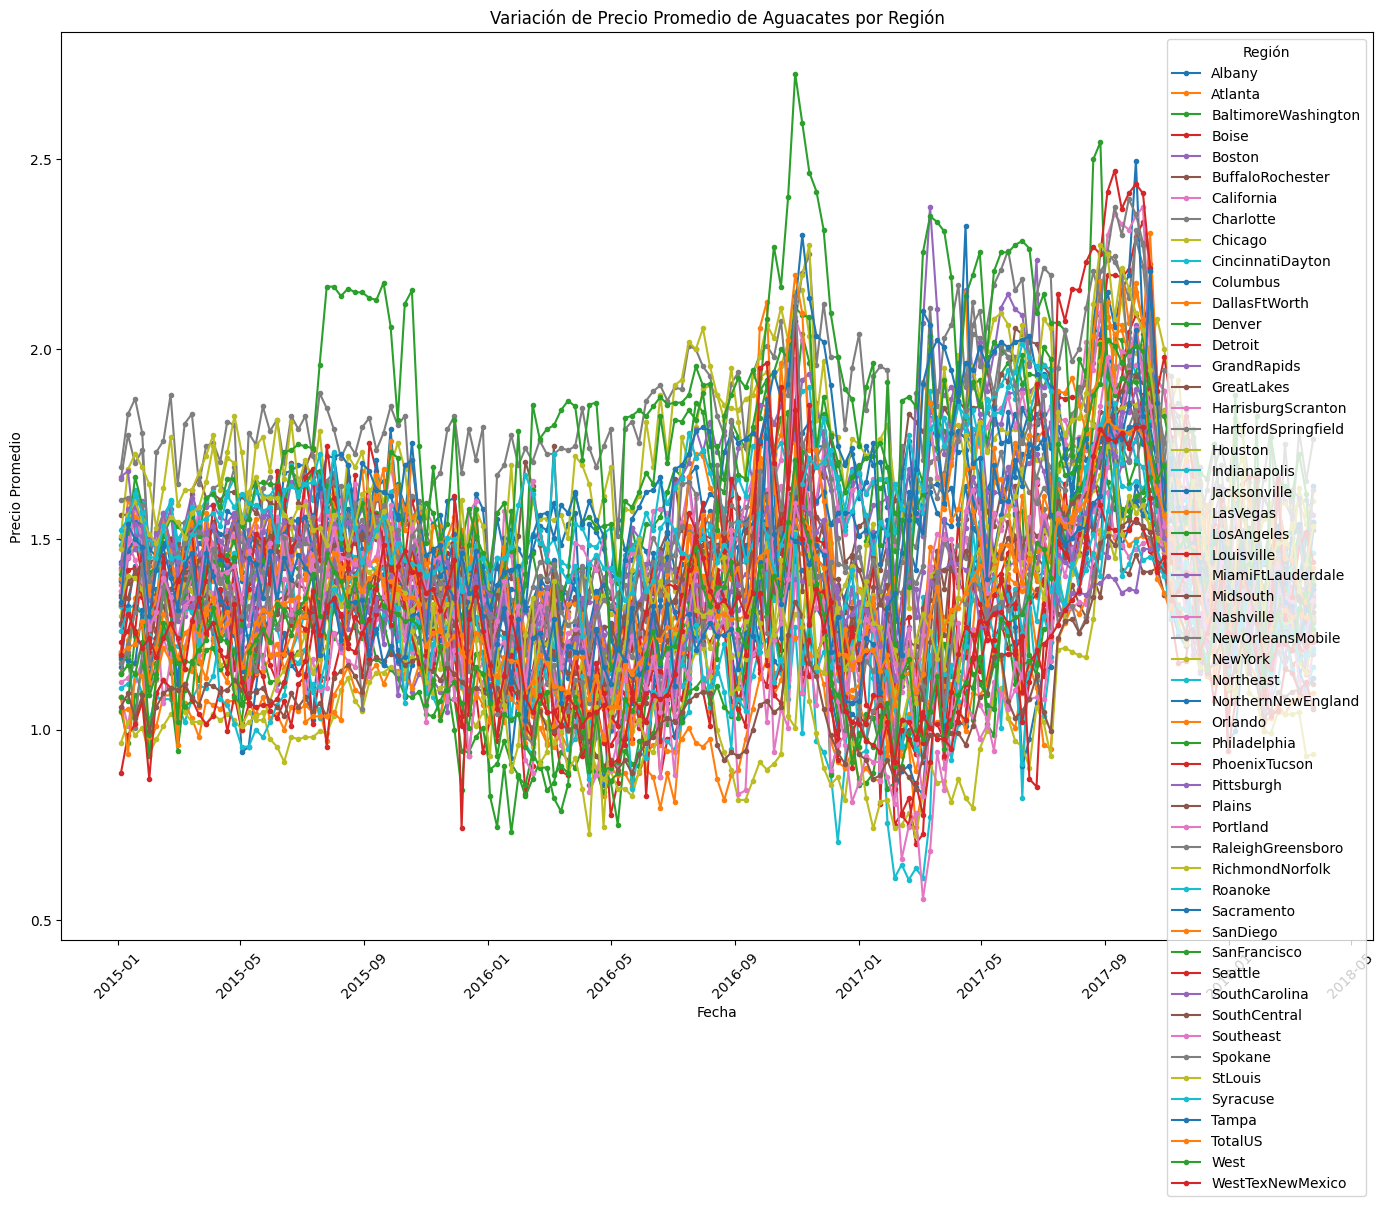

In [9]:
# Esperado: Utiliza gráficos de líneas para visualizar cómo varían los precios de aguacates por región a lo largo de diferentes estaciones del año.
# Agrupa los datos por 'region' y 'Date' y calcula el promedio de 'AveragePrice' para cada combinación
promedio = chart.df.groupby(['region', 'Date'])['AveragePrice'].mean().reset_index()
# Calcula el promedio de AveragePrice para cada región.
# Representa gráficamente las tendencias utilizando plt.plot() de matplotlib.
# Configuración de la gráfica

chart.figureConfig(14,12)

# # Iterar sobre cada región y graficar la serie temporal
for region in promedio['region'].unique():
    datos_region = promedio[promedio['region'] == region]
    plt.plot(datos_region['Date'], datos_region['AveragePrice'], label=region,marker='.')

# Etiquetas y título
plt.xlabel("Fecha")
plt.ylabel("Precio Promedio")
plt.title("Variación de Precio Promedio de Aguacates por Región")
plt.legend(title='Región', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

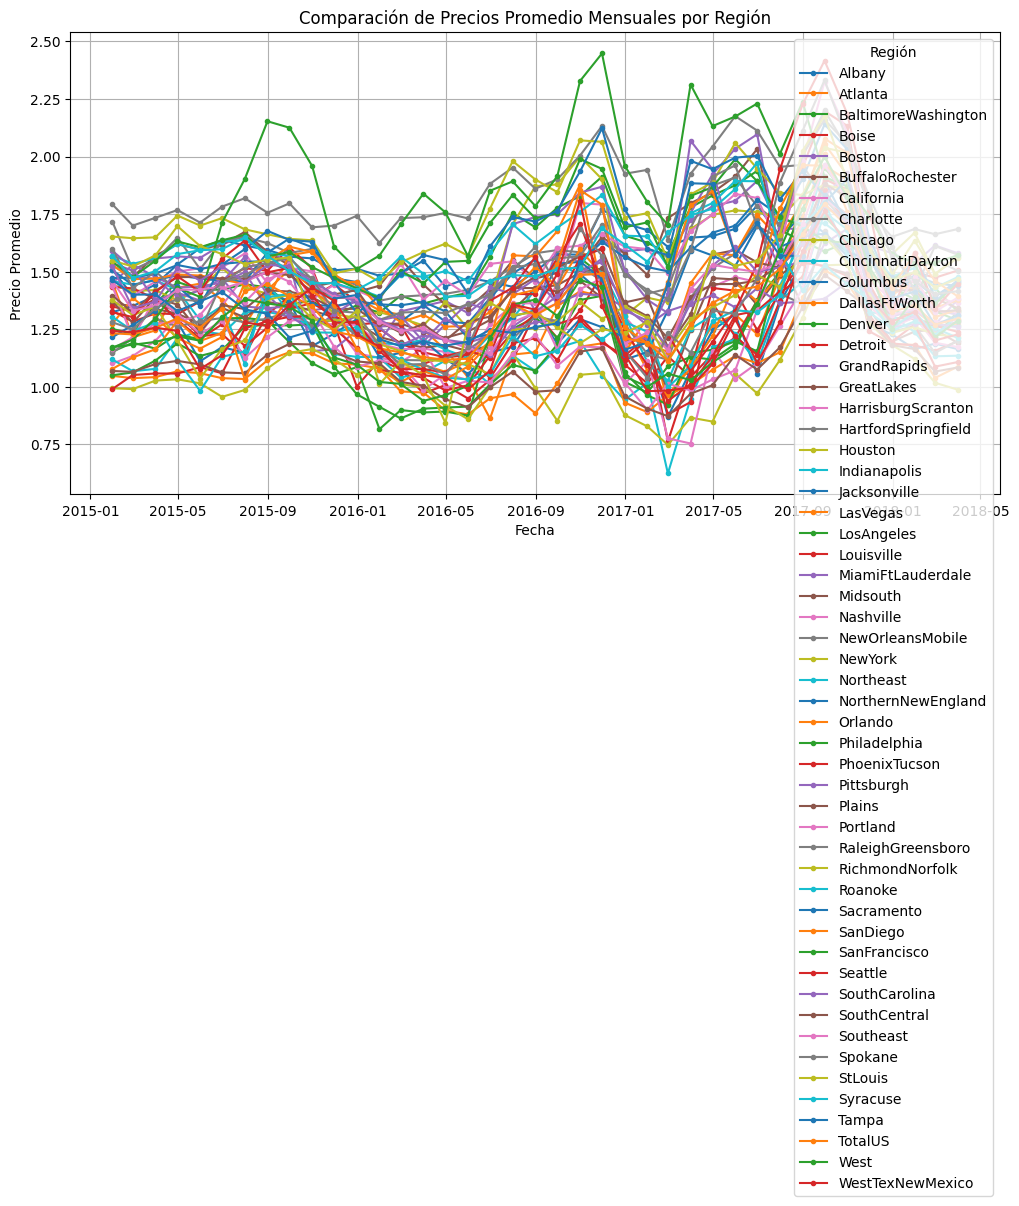

In [10]:
# 1.3 Comparación de Precios Promedio Mensuales:
# Uso de Datos: Usa las columnas AveragePrice y Date.
# Esperado: Calcula y compara los precios promedio mensuales.
# Agrupa los datos por mes usando pd.Grouper con freq='M'.
# Calcula el promedio de AveragePrice para cada mes con mean().
# Visualiza los resultados con un gráfico de líneas usando plt.plot().
# Agrupa los datos por 'region' y por mes, y calcula el promedio de 'AveragePrice'
promedio_mensual = chart.df.groupby(['region', pd.Grouper(key='Date', freq='ME')])['AveragePrice'].mean().reset_index()
chart.figureConfig(12, 6)

for region in promedio_mensual['region'].unique():
    # Filtra el DataFrame para obtener solo los datos de una región específica
    data_region = promedio_mensual[promedio_mensual['region'] == region]
    plt.plot(data_region['Date'], data_region['AveragePrice'], label=region,marker=".")

# Configuraciones del gráfico
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio')
plt.title('Comparación de Precios Promedio Mensuales por Región')
plt.legend(title='Región')
plt.grid(True)
plt.show()

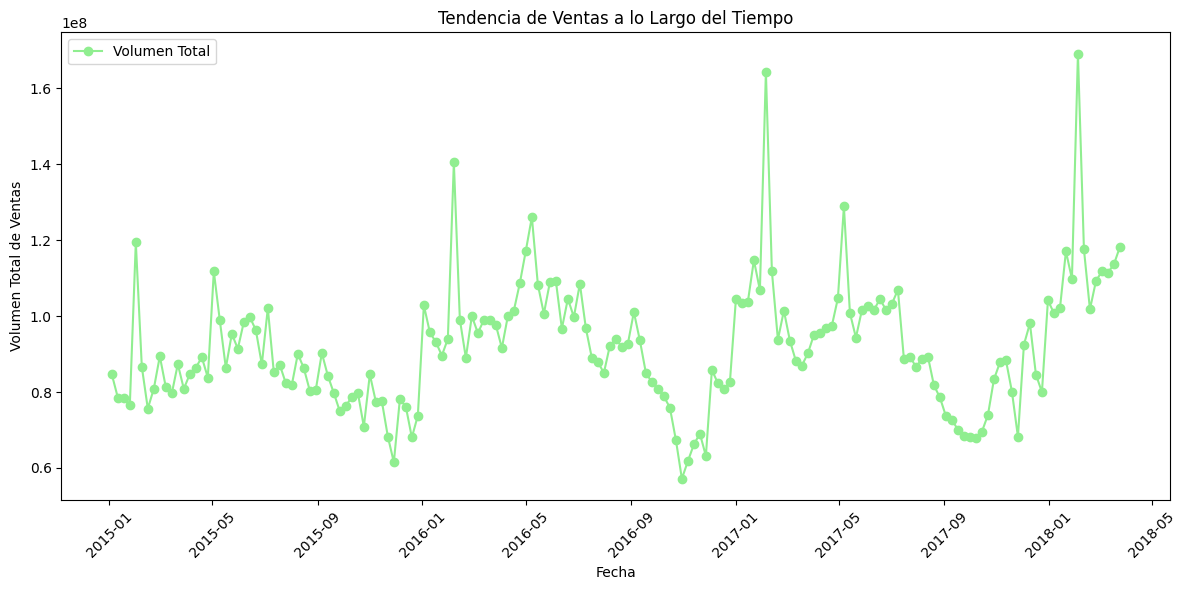

In [11]:
# 1.4 Tendencia de Ventas a lo Largo del Tiempo:

# Uso de Datos: Usa las columnas Total Volume y Date.
# Esperado: Analiza cómo varía el volumen total de ventas a lo largo del tiempo.
# Agrupa los datos por Date y suma el Total Volume usando groupby().
# Visualiza los resultados usando un gráfico de líneas con plt.plot() para mostrar la tendencia.
chart.figureConfig(12, 6)
# Agrupar por fecha y sumar el volumen total
df_grouped = chart.df.groupby('Date').sum()['Total Volume']
plt.plot(df_grouped.index, df_grouped.values, marker='o', color='lightgreen', label='Volumen Total')

# Etiquetas y título
plt.xlabel("Fecha")
plt.ylabel("Volumen Total de Ventas")
plt.title("Tendencia de Ventas a lo Largo del Tiempo")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


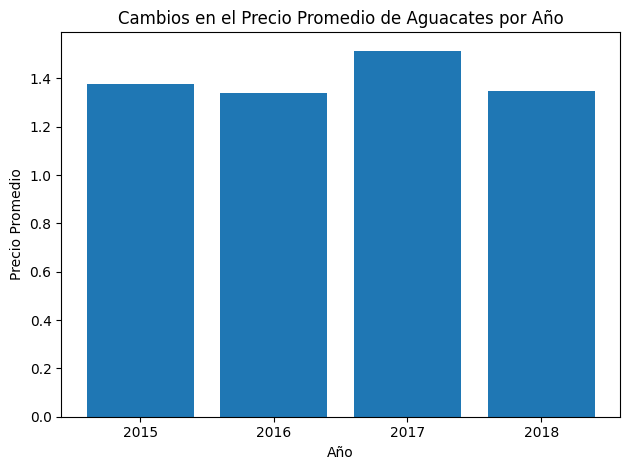

In [12]:
# 1.5 Análisis de Cambios en Precios Anuales:

# Uso de Datos: Usa las columnas AveragePrice y year.
# Esperado: Observa las diferencias anuales en los precios promedio.
# Agrupa los datos por year utilizando groupby().
# Calcula el promedio de AveragePrice para cada año.
# Representa los resultados en un gráfico de barras usando plt.bar() que compare los precios de cada año.
promedio_year =  pd.DataFrame(chart.df.groupby('year')['AveragePrice'].mean().reset_index())
# Crear el gráfico de barras
plt.bar(promedio_year['year'], promedio_year['AveragePrice'], width=0.8)

# Etiquetas y título
plt.xlabel("Año")
plt.ylabel("Precio Promedio")
plt.title("Cambios en el Precio Promedio de Aguacates por Año")
plt.xticks(promedio_year['year'])  # Asegura que se muestren todos los años
plt.tight_layout()
plt.show()

/tmp/ipykernel_46389/1457849473.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='region', y='Total Volume', data=chart.df, palette="muted",legend=False)


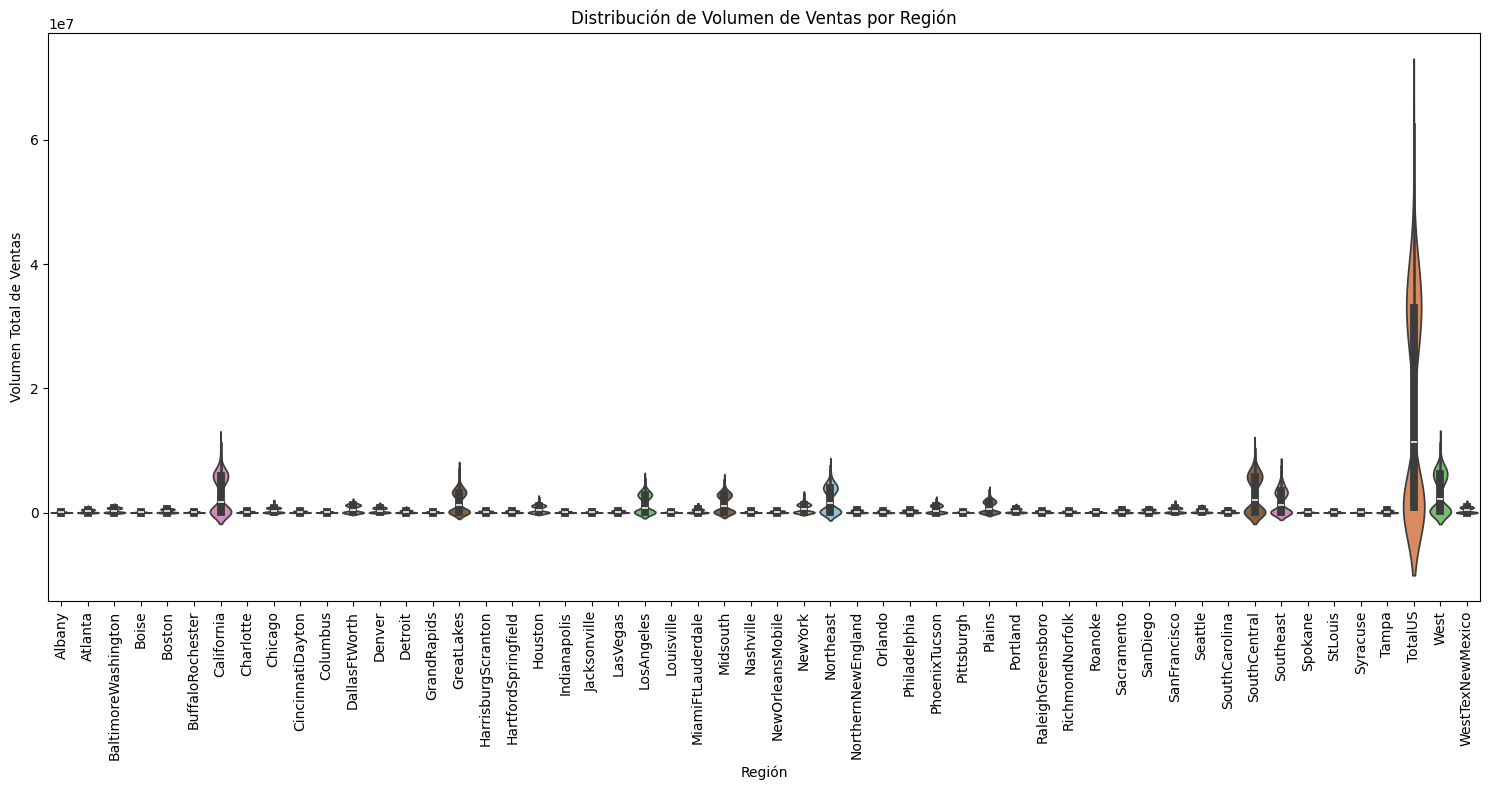

In [13]:
# 2.1 Gráficos para Visualización de Datos
# Resumen: La visualización de datos es clave para identificar patrones y relaciones entre diferentes variables. 
# Los gráficos apropiados pueden proporcionar información valiosa sobre el comportamiento de los precios y volúmenes de ventas.

# Gráfico de Violín de Volumen de Ventas por Región:
# Uso de Datos: Usa las columnas Total Volume y region.
# Esperado: Visualiza la distribución de ventas en diferentes regiones.
# Utiliza la función violinplot de seaborn para crear gráficos de violín.
# Configura los ejes para mostrar la relación entre Total Volume y region.
# Añade etiquetas y títulos usando plt.title() y plt.xlabel() para facilitar la interpretación.

# Gráfico de violín de Volumen de Ventas por Región
plt.figure(figsize=(15, 8))
sns.violinplot(x='region', y='Total Volume', data=chart.df, palette="muted",legend=False)

# Configuraciones del gráfico
plt.xticks(rotation=90)  # Rotar etiquetas para mejorar visibilidad
plt.xlabel('Región')
plt.ylabel('Volumen Total de Ventas')
plt.title('Distribución de Volumen de Ventas por Región')
plt.tight_layout()  # Ajusta el diseño para evitar superposición
plt.show()

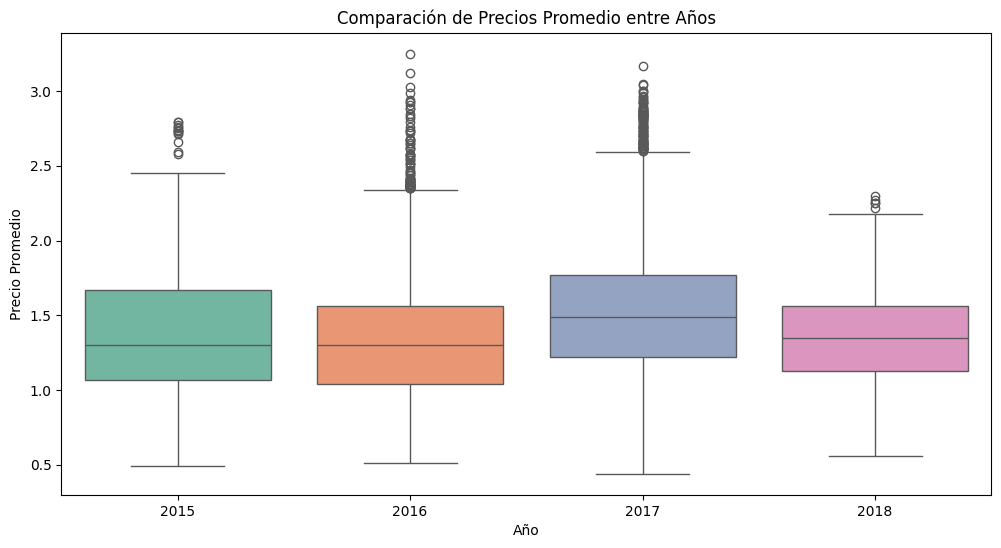

In [14]:
# 2.2 Boxplot Comparativo de Precios entre Años:

# Uso de Datos: Usa las columnas AveragePrice y year.
# Esperado: Genera boxplots para comparar la distribución de precios.
# Utiliza boxplot de seaborn para crear boxplots que comparen AveragePrice entre diferentes años.
# Asegúrate de que cada boxplot represente un año diferente.
# Incluye etiquetas y títulos descriptivos usando plt.title().


# Gráfico boxplot comparativo de Precios entre Años
chart.figureConfig()
sns.boxplot(x='year', y='AveragePrice', data=chart.df, palette="Set2", hue='year', legend=False)

# Configuraciones del gráfico
plt.xlabel('Año')
plt.ylabel('Precio Promedio')
plt.title('Comparación de Precios Promedio entre Años')
plt.show()

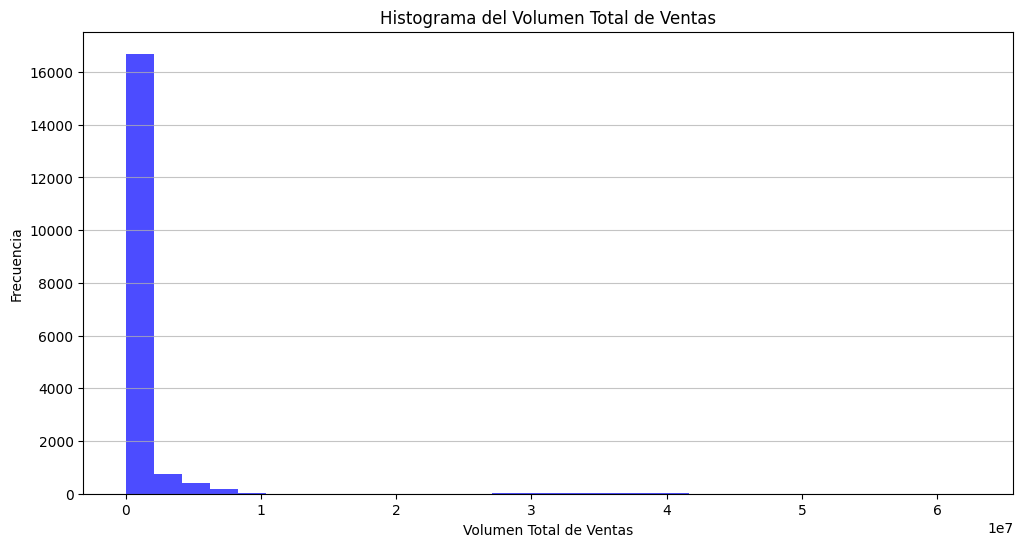

In [15]:
# 2.3 Histograma de Volumen Total de Ventas:

# Uso de Datos: Usa la columna Total Volume.
# Esperado: Crea un histograma para mostrar la distribución del volumen total de ventas.
# Utiliza hist() de matplotlib para crear el histograma.
# Ajusta el número de bins para una visualización clara usando el parámetro bins.
# Añade etiquetas y un título que describa lo que se muestra.

# Crear el histograma
chart.figureConfig()
plt.hist(chart.df['Total Volume'], bins=30, color='blue', alpha=0.7)

# Añadir etiquetas y título
plt.xlabel('Volumen Total de Ventas')
plt.ylabel('Frecuencia')
plt.title('Histograma del Volumen Total de Ventas')

# Mostrar el gráfico
plt.grid(axis='y', alpha=0.75)
plt.show()

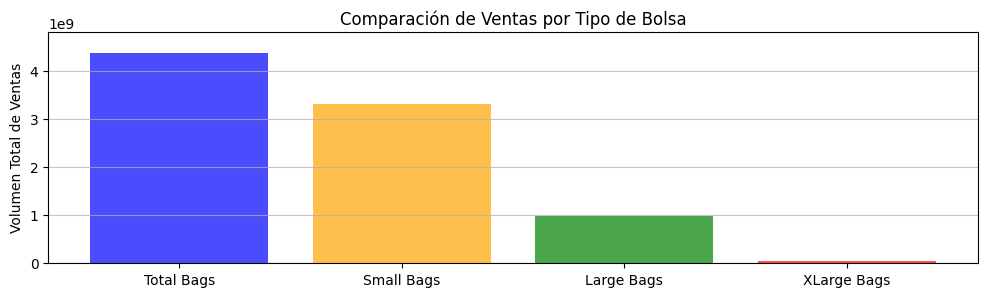

In [21]:
# 2.4 Gráfico de Barras de Ventas por Tipo de Bolsa:

# Uso de Datos: Utiliza las columnas Total Bags, Small Bags, Large Bags y XLarge Bags.
# Esperado: Compara las ventas de diferentes tipos de bolsas.
# Suma los volúmenes de ventas por tipo de bolsa utilizando sum().
# Crea un gráfico de barras con plt.bar() para mostrar las diferencias en ventas.
# Asegúrate de incluir etiquetas para cada tipo de bolsa.

# Sumar los volúmenes de ventas por tipo de bolsa
total_bags = chart.df['Total Bags'].sum()
small_bags = chart.df['Small Bags'].sum()
large_bags = chart.df['Large Bags'].sum()
xlarge_bags = chart.df['XLarge Bags'].sum()

# Crear una lista de tipos de bolsas y sus correspondientes ventas
labels = ['Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
sales = [total_bags, small_bags, large_bags, xlarge_bags]

# Crear el gráfico de barras
chart.figureConfig(12,3)
plt.bar(labels, sales, color=['blue', 'orange', 'green', 'red'], alpha=0.7)

# Añadir etiquetas y título
plt.ylabel('Volumen Total de Ventas')
plt.title('Comparación de Ventas por Tipo de Bolsa')
plt.ylim(0, max(sales) * 1.1)  # Ajustar el límite del eje y

# Mostrar el gráfico
plt.grid(axis='y', alpha=0.75)
plt.show()

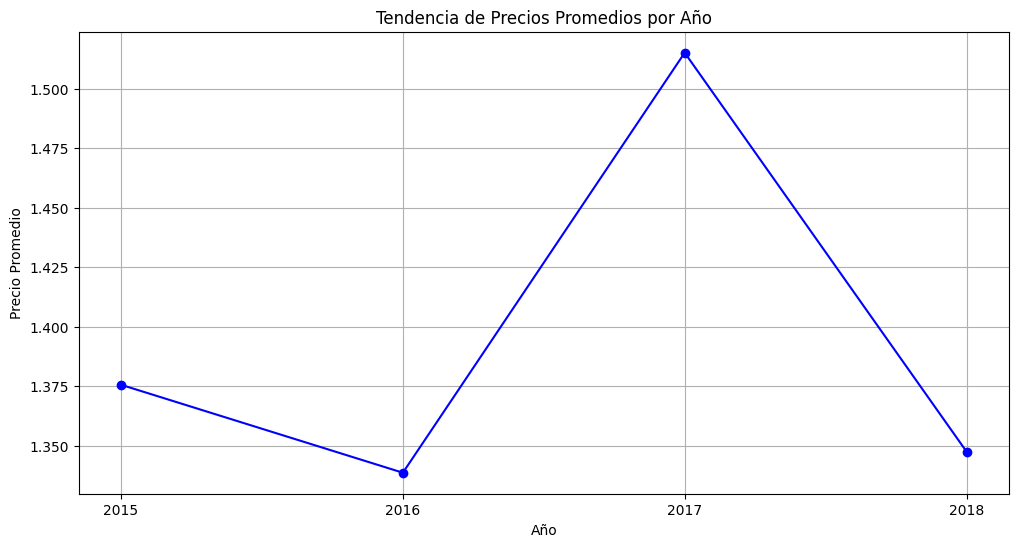

In [22]:
# 2.5 Gráfico de Líneas de Precios Promedios por Año:

# Uso de Datos: Utiliza las columnas AveragePrice y year.
# Esperado: Visualiza la tendencia de precios promedio a lo largo de los años.
# Agrupa los datos por year y calcula el promedio de AveragePrice.
# Usa plt.plot() para crear un gráfico de líneas que muestre la evolución de precios.
# Añade un título y etiquetas descriptivas a los ejes usando plt.title() y plt.xlabel().
# Agrupar los datos por año y calcular el promedio de AveragePrice
average_price_by_year = chart.df.groupby('year')['AveragePrice'].mean().reset_index()

# Crear el gráfico de líneas
chart.figureConfig()
plt.plot(average_price_by_year['year'], average_price_by_year['AveragePrice'], marker='o', color='blue', linestyle='-')

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Precio Promedio')
plt.title('Tendencia de Precios Promedios por Año')

# Mostrar el gráfico
plt.grid()
plt.xticks(average_price_by_year['year'])  # Asegurar que se muestren todos los años en el eje x
plt.show()

In [ ]:
# Elasticidad del Precio
# 3.1 Elasticidad Precio-Demanda por Año:

# Uso de Datos: Usa las columnas AveragePrice y Total Volume.
# Esperado: Calcula la elasticidad del precio de la demanda para cada año.
# Calcula la variación porcentual de Total Volume y AveragePrice utilizando pd.pct_change().
# Utiliza la fórmula de elasticidad para determinar la sensibilidad de la demanda respecto al precio.
# Presenta los resultados en un gráfico de líneas usando plt.plot() para mostrar la elasticidad por año.